In [2]:
from apportionment import *

c:\Users\janko\anaconda3x\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df = pd.read_csv("./vis_data/electable-unweighted-vis-1m-2023.csv")

def visualise_and_print(link):
    df = pd.read_csv(link)

    plt.figure(figsize=(10, 6))

    x_values = (df['samples'] / 1000000) * 100
    y_values = df['diff']
    y_vals =  y_values - (3 * x_values)

    y_deriv = y_vals.diff()
    y_rolling = y_deriv.rolling(window=100, center=True).mean()

    x = np.arange(0, 4)
    y = 3 * x

    plt.plot(x_values, y_deriv, '-', markersize=1, label="First difference")
    plt.plot(x_values, y_rolling, '-', markersize=1, label="Rolling mean (window size = 0.01 % of voters)")

    plt.plot(x, y * 0, label='Linear trend')

    plt.xlabel('size of organised group (%)')
    plt.ylabel('change of seats - first difference')
    plt.title('Difference of seat distribution function')

    plt.legend()
    plt.show()

    max_index = y_rolling.idxmax()
    print(max_index)

    max_index = y_rolling[:3000].idxmax()
    print(max_index)




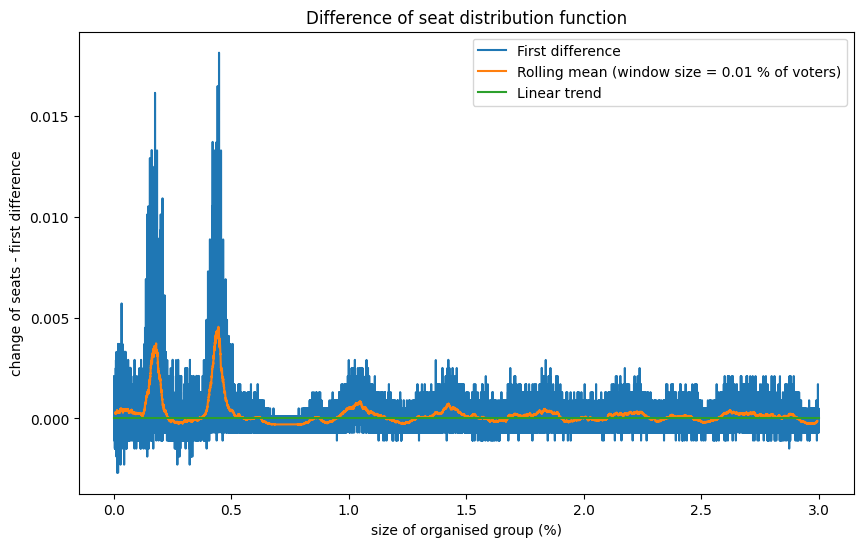

4446
1794


In [4]:
visualise_and_print("./vis_data/electable-unweighted-vis-1m-2023.csv")

In [5]:
for year in constants.years:
    ## unweighted electable subjets
    raw2visualisable(f"1m-{year}.csv", weighted=False, only_electable=False, year=year)
    raw2visualisable(f"1m-{year}.csv", weighted=False, only_electable=True, year=year)

1m-2023.csv done
1m-2023.csv done
1m-2020.csv done
1m-2020.csv done
1m-2016.csv done
1m-2016.csv done
1m-2012.csv done
1m-2012.csv done
1m-2010.csv done
1m-2010.csv done
1m-2006.csv done
1m-2006.csv done
1m-2002.csv done
1m-2002.csv done
1m-1998.csv done
1m-1998.csv done
1m-1994.csv done
1m-1994.csv done


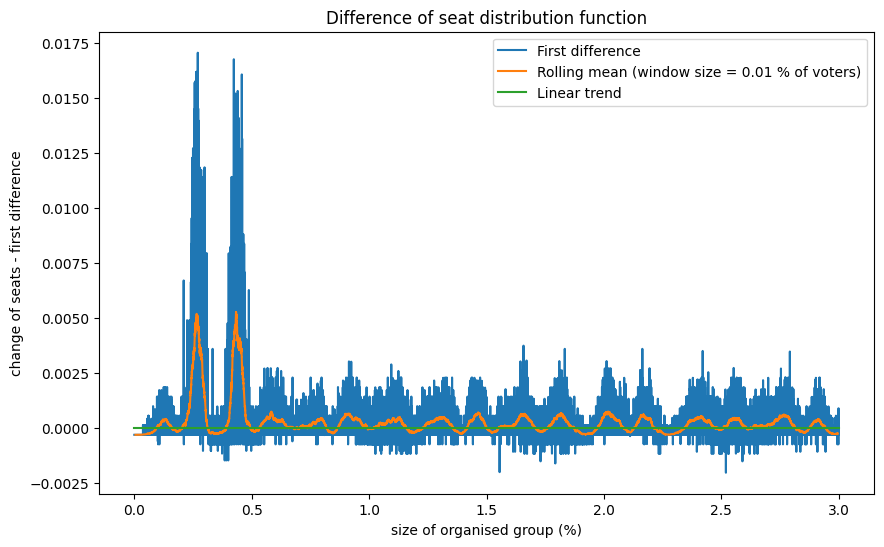

4333
2655


In [6]:
visualise_and_print("./vis_data/electable-unweighted-vis-1m-2012.csv")

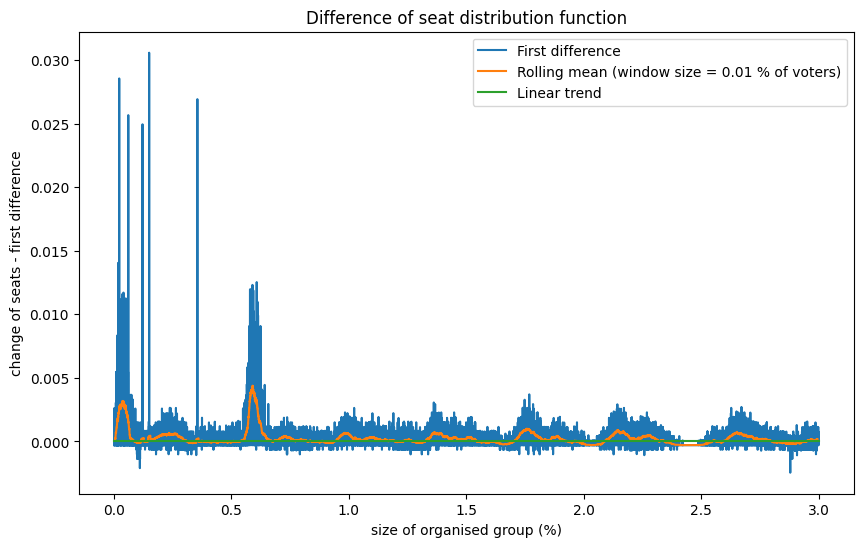

5900
359


In [7]:
visualise_and_print("./vis_data/electable-unweighted-vis-1m-2016.csv")

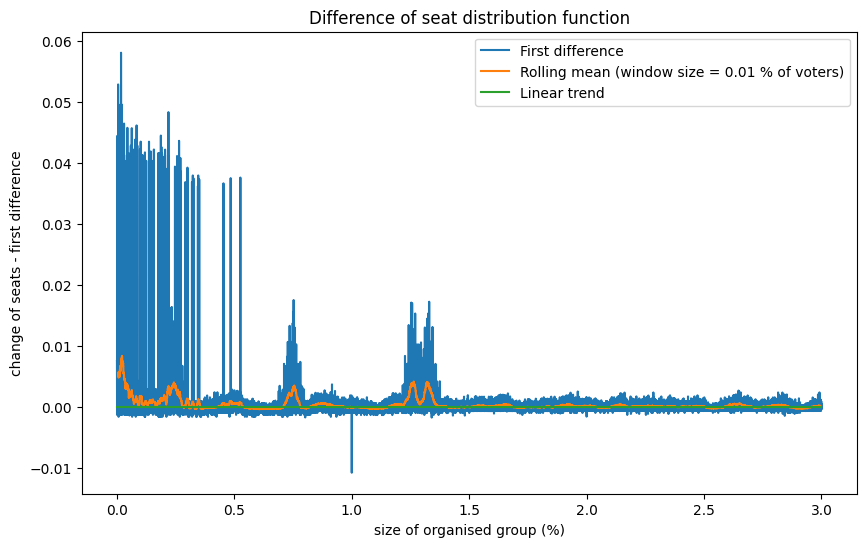

218
218


In [8]:
visualise_and_print("./vis_data/electable-unweighted-vis-1m-2020.csv")